In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from math import sqrt

In [3]:
# # Run at every new runtime/session
# from google.colab import drive
# drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [32]:
train_data = "/content/drive/MyDrive/ML/loan_prediction/loan_prediction_train.csv"
test_data = "/content/drive/MyDrive/ML/loan_prediction/loan_prediction_test.csv"

train_data_set = pd.read_csv(train_data)
test_data_set = pd.read_csv(test_data)

sub_col1 = test_data_set['Loan_ID']

In [33]:
train_data_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [34]:
test_data_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [35]:
train_data_set.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [36]:
print(train_data_set.info())
print(test_data_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #

In [37]:
continous_variable = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]
target_variable = "Loan_Status"
unwanted = ['Loan_ID']
categorical_variable = list(set(train_data_set.columns)-set(continous_variable+[target_variable]+unwanted))

In [38]:
#missing values and dups check
print("Missing values check:")
print("In Train\n",train_data_set.isnull().sum(),'\n')
print("In Test\n",test_data_set.isnull().sum(),'\n')

print("Duplicate values check in Train:")
if len(train_data_set[train_data_set.duplicated()]) > 0:
    print("Number of duplicated entries {}".format(len(train_data_set[train_data_set.duplicated()])))
    print(train_data_set[train_data_set.duplicated()])
else:
    print("No duplicated entries found")

Missing values check:
In Train
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64 

In Test
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64 

Duplicate values check in Train:
No duplicated entries found


In [39]:
#removing dups
if len(train_data_set[train_data_set.duplicated()]) > 0:
  print("Dropping Duplicates")
  train_data_set = train_data_set.drop_duplicates()
  print("{} duplicates now".format(len(train_data_set[train_data_set.duplicated()])))

Missing Count 50 

1.0    475
0.0     89
Name: Credit_History, dtype: int64 

Missing Count 3 

Yes    398
No     213
Name: Married, dtype: int64 

Missing Count 13 

Male      489
Female    112
Name: Gender, dtype: int64 

Missing Count 0 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

Missing Count 32 

No     500
Yes     82
Name: Self_Employed, dtype: int64 

Missing Count 15 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

Missing Count 0 

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 



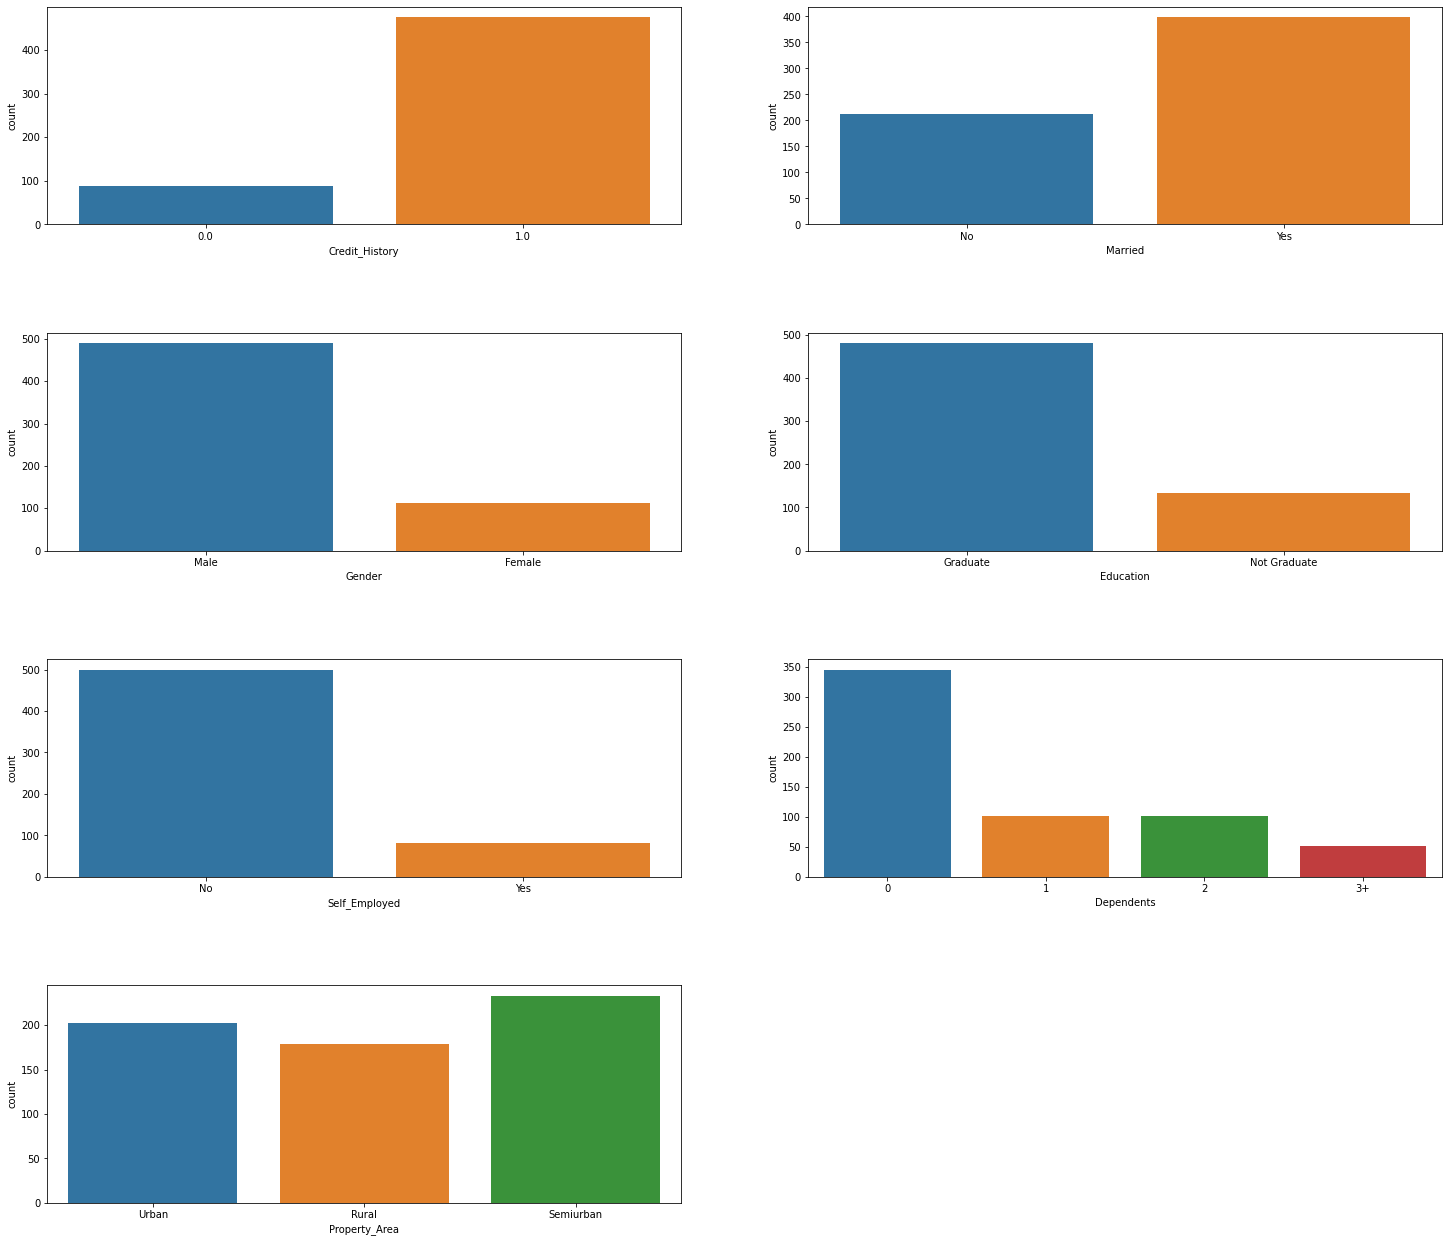

In [40]:
#value_counts in each categorical column
subplots_count = len(categorical_variable)
fig = plt.figure(figsize=(25,40))
fig.subplots_adjust(hspace=0.5)
for v,col in enumerate(categorical_variable):
  print("Missing Count",train_data_set[col].isnull().sum(),'\n')
  print(train_data_set[col].value_counts(),'\n')
  v+=1
  axs = fig.add_subplot(subplots_count,2,v)
  sns.countplot(x=col,data=train_data_set)
plt.show()

In [41]:
for cv in categorical_variable:
  train_data_set[cv] = train_data_set[cv].fillna(train_data_set[cv].mode()[0])
train_data_set['Loan_Amount_Term'] = train_data_set['Loan_Amount_Term'].fillna(train_data_set['Loan_Amount_Term'].mode()[0])
train_data_set['LoanAmount'] = train_data_set['LoanAmount'].fillna(train_data_set['LoanAmount'].mean())

for cv in categorical_variable:
  test_data_set[cv] = test_data_set[cv].fillna(test_data_set[cv].mode()[0])
test_data_set['Loan_Amount_Term'] = test_data_set['Loan_Amount_Term'].fillna(test_data_set['Loan_Amount_Term'].mode()[0])
test_data_set['LoanAmount'] = test_data_set['LoanAmount'].fillna(test_data_set['LoanAmount'].mean())

In [42]:
print("In Train\n",train_data_set.isnull().sum(),'\n')
print("In Test\n",test_data_set.isnull().sum(),'\n')

In Train
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64 

In Test
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64 



Value Counts:
Y    422
N    192
Name: Loan_Status, dtype: int64


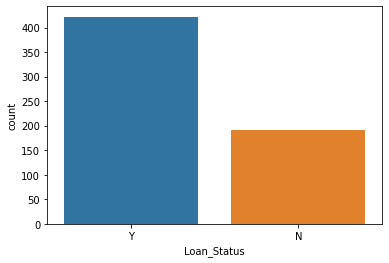

In [43]:
print("Value Counts:",train_data_set[target_variable].value_counts(),sep='\n')
sns.countplot(x=train_data_set[target_variable])

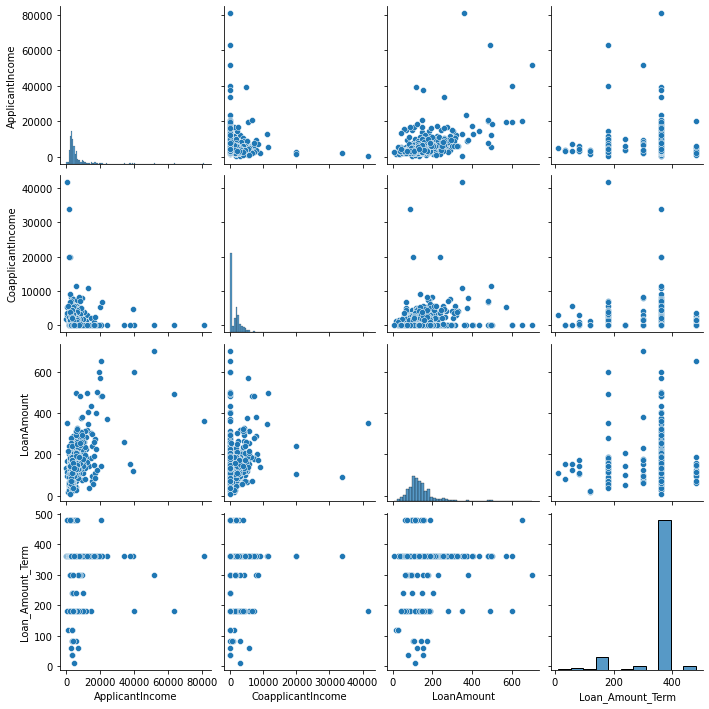

In [44]:
sns.pairplot(data = train_data_set[continous_variable])

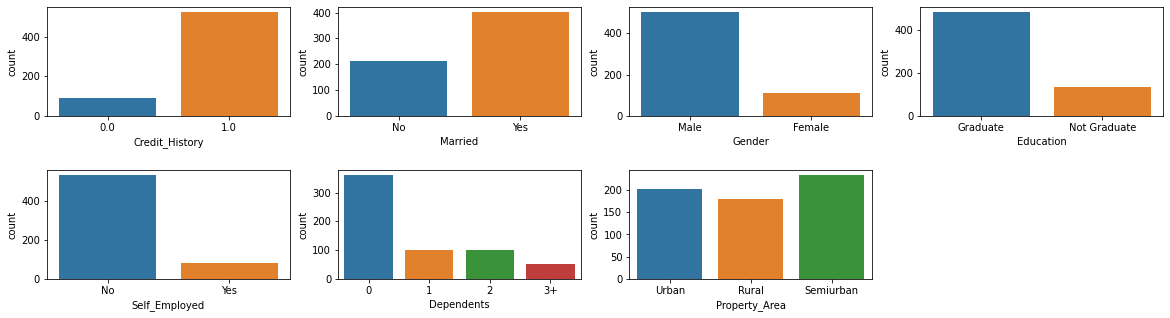

In [45]:
subplots_count = len(categorical_variable)

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.5)
for v,col in enumerate(categorical_variable):
  v+=1
  axs = fig.add_subplot(subplots_count,4,v)
  sns.countplot(x=col,data=train_data_set[categorical_variable])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

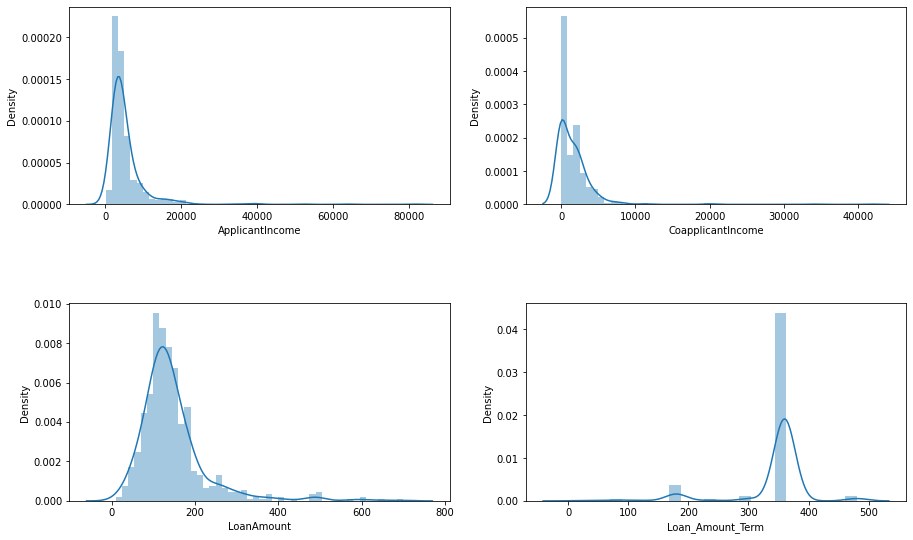

In [46]:
fig = plt.figure(figsize=(15,20))
fig.subplots_adjust(hspace=0.5)
subplots_count = len(continous_variable)
for v,col in enumerate(continous_variable):
  v+=1
  axs = fig.add_subplot(subplots_count,2,v)
  sns.distplot(train_data_set[continous_variable][col],ax=axs,hist=True, kde=True)
plt.show()

In [47]:
def emi_cal(p,r,n):
  p=p*1000
  r=r/(12*100)
  emi = (p*r*pow(1+r,n))/(pow(1+r,n)-1) 
  return round(emi,2)

train_data_set['TotalIncome'] = train_data_set['ApplicantIncome'] + train_data_set['CoapplicantIncome']
train_data_set = train_data_set.drop(['ApplicantIncome','CoapplicantIncome'],axis=1)
   
train_data_set['Monthly_Payment'] = train_data_set.apply(lambda x: emi_cal(x['LoanAmount'],9,x['Loan_Amount_Term']),axis=1)
train_data_set['Income_Final'] = train_data_set['TotalIncome'] - train_data_set['Monthly_Payment']
train_data_set = train_data_set.drop(["LoanAmount","Loan_Amount_Term"],axis=1)


test_data_set['TotalIncome'] = test_data_set['ApplicantIncome'] + test_data_set['CoapplicantIncome']
test_data_set = test_data_set.drop(['ApplicantIncome','CoapplicantIncome'],axis=1)
test_data_set['Monthly_Payment'] = test_data_set.apply(lambda x: emi_cal(x['LoanAmount'],9,x['Loan_Amount_Term']),axis=1)
test_data_set['Income_Final'] = test_data_set['TotalIncome'] - test_data_set['Monthly_Payment']
test_data_set = test_data_set.drop(["LoanAmount","Loan_Amount_Term"],axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will 

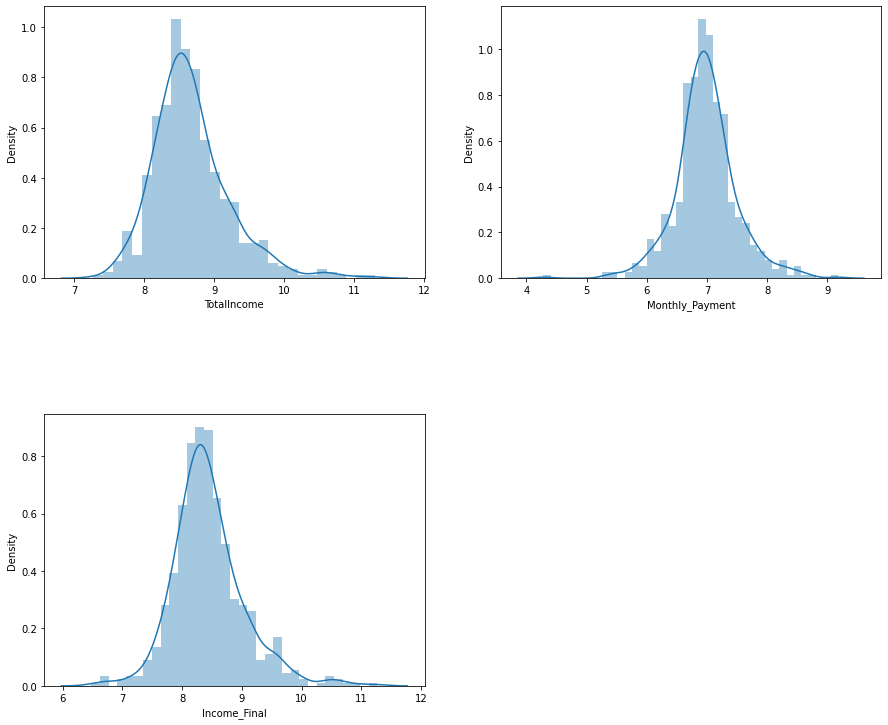

In [48]:
train_data_set['TotalIncome'] = np.log(train_data_set['TotalIncome'])
train_data_set['Monthly_Payment'] = np.log(train_data_set['Monthly_Payment'])
train_data_set['Income_Final'] = np.log(train_data_set['Income_Final'])

test_data_set['TotalIncome'] = np.log(test_data_set['TotalIncome'])
test_data_set['Monthly_Payment'] = np.log(test_data_set['Monthly_Payment'])
test_data_set['Income_Final'] = np.log(test_data_set['Income_Final'])

fig = plt.figure(figsize=(15,20))
fig.subplots_adjust(hspace=0.5)
for v,col in enumerate(["TotalIncome","Monthly_Payment","Income_Final"]):
  v+=1
  axs = fig.add_subplot(3,2,v)
  sns.distplot(train_data_set[col],ax=axs,hist=True, kde=True)
plt.show()

In [49]:
train_data_set=train_data_set.drop(unwanted,axis=1)
test_data_set = test_data_set.drop(unwanted,axis=1)

In [50]:
train_data_set.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,TotalIncome,Monthly_Payment,Income_Final
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,7.071633,8.449113
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.714568,6.937236,8.529335
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,6.274856,7.811548
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,8.505323,6.872698,8.287893
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,7.033965,8.489921


In [51]:
test_data_set.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,TotalIncome,Monthly_Payment,Income_Final
0,Male,Yes,0,Graduate,No,1.0,Urban,8.651724,6.785678,8.483620
1,Male,Yes,1,Graduate,No,1.0,Urban,8.428581,6.921481,8.178128
2,Male,Yes,2,Graduate,No,1.0,Urban,8.824678,7.422744,8.542155
3,Male,Yes,2,Graduate,No,1.0,Urban,8.494129,6.690370,8.314190
4,Male,No,0,Not Graduate,No,1.0,Urban,8.094378,6.441919,7.881707


In [52]:
train_data_set['Loan_Status']=train_data_set['Loan_Status'].map({"Y":1,"N":0})
train_dummied=pd.get_dummies(data = train_data_set, columns=categorical_variable, prefix=categorical_variable,prefix_sep= "_")

test_dummied=pd.get_dummies(data = test_data_set, columns=categorical_variable, prefix=categorical_variable,prefix_sep= "_")

In [53]:
train_dummied = train_dummied.fillna(0)

In [54]:
train_dummied.isnull().sum()

Loan_Status                0
TotalIncome                0
Monthly_Payment            0
Income_Final               0
Credit_History_0.0         0
Credit_History_1.0         0
Married_No                 0
Married_Yes                0
Gender_Female              0
Gender_Male                0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [55]:
test_dummied = test_dummied.fillna(0)

In [56]:
test_dummied.isnull().sum()

TotalIncome                0
Monthly_Payment            0
Income_Final               0
Credit_History_0.0         0
Credit_History_1.0         0
Married_No                 0
Married_Yes                0
Gender_Female              0
Gender_Male                0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [57]:
y_train = train_dummied[target_variable]
x_train = train_dummied.drop(target_variable,axis=1)

In [58]:
lr_model = LogisticRegression(max_iter=200)

In [60]:
kfold=KFold(n_splits=10,shuffle=True,random_state=8) 
acc=cross_val_score(lr_model,x_train,y_train,scoring='accuracy',cv=kfold)
print('accuracy : {}'.format(acc.mean()))

accuracy : 0.8075356953992596


In [61]:
lr_model.fit(x_train,y_train)
test_pred = lr_model.predict(test_dummied)

In [64]:
sub_df = pd.DataFrame()
sub_df['Loan_ID'] = sub_col1
sub_df['Loan_Status'] = test_pred
sub_df['Loan_Status'] = sub_df['Loan_Status'].replace({1:'Y',0:'N'})
sub_df.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [65]:
sub_df.to_csv('loan_prediction_submission.csv',index=False)
# !cp loan_prediction_submission.csv "drive/My Drive/"